In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


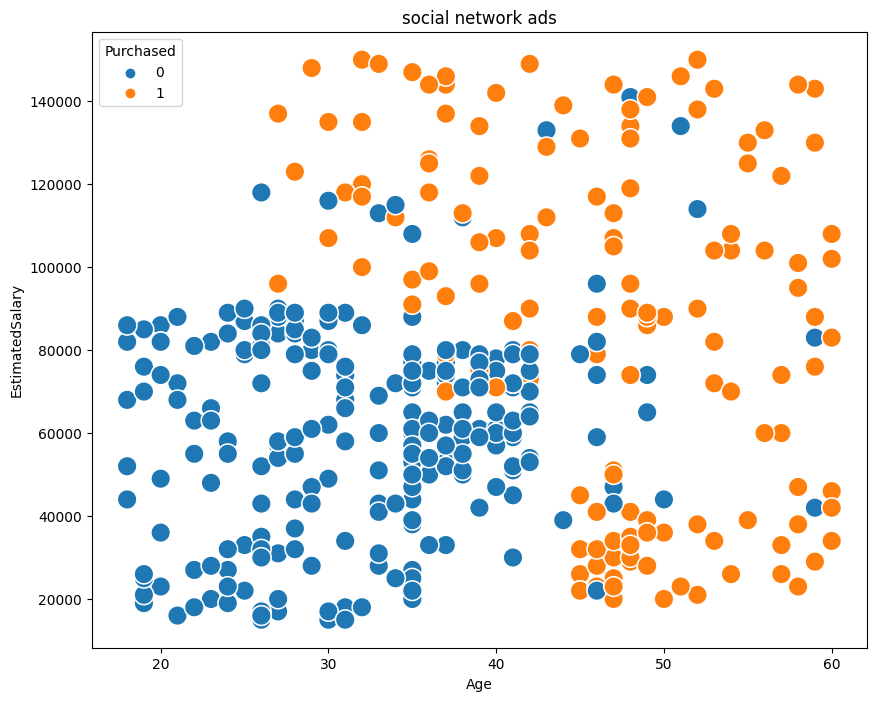

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,s=200)
plt.title("social network ads")
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
ax = plt.gca()

In [3]:
del(df['User ID'])

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])


In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
from sklearn.model_selection import train_test_split
X=df[['Gender','Age','EstimatedSalary']].values
y=df['Purchased'].values

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)
X_train

array([[     0,     28,  59000],
       [     1,     40,  78000],
       [     0,     59,  29000],
       [     1,     37,  74000],
       [     1,     29,  43000],
       [     0,     28,  84000],
       [     1,     25,  79000],
       [     0,     40,  75000],
       [     0,     35,  25000],
       [     0,     47,  47000],
       [     0,     50,  20000],
       [     1,     25,  90000],
       [     1,     43, 129000],
       [     0,     47, 113000],
       [     0,     18,  86000],
       [     1,     37,  70000],
       [     0,     46,  74000],
       [     1,     41,  45000],
       [     0,     28,  37000],
       [     0,     41,  72000],
       [     1,     19,  85000],
       [     1,     35,  91000],
       [     0,     19,  21000],
       [     1,     32,  18000],
       [     1,     48,  74000],
       [     1,     46,  88000],
       [     0,     35,  23000],
       [     1,     36, 118000],
       [     1,     26,  16000],
       [     1,     27,  90000],
       [  

**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
X_train.shape

(300, 3)

**Fitting Decision Tree Classification to the Training set**

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [9]:
y_pred=dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

Accuracy score:0.92
ROC Accuret score:0.9253539253539254


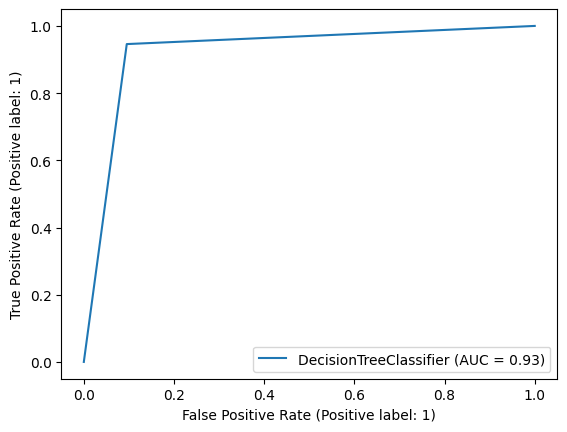

In [11]:
from sklearn.metrics import accuracy_score,roc_auc_score,RocCurveDisplay
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy score:{acc}')
acc1=roc_auc_score(y_test,y_pred)
print(f'ROC Accuret score:{acc1}')
RocCurveDisplay.from_estimator(dt,X_test,y_test)

In [13]:
k=pd.DataFrame(y_test,columns=['Y_Test'])
k1=pd.DataFrame(y_pred,columns=['Y_Pred'])
f=pd.concat(([k,k1]),axis=1)
f

,Y_Test,Y_Pred
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  6],
       [ 2, 35]])

Text(45.722222222222214, 0.5, 'Truth')

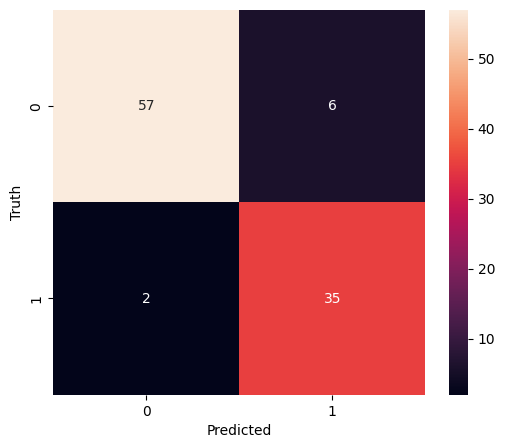

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Visualising the Training set results**

In [17]:
clf_tree=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

<function matplotlib.pyplot.show(close=None, block=None)>

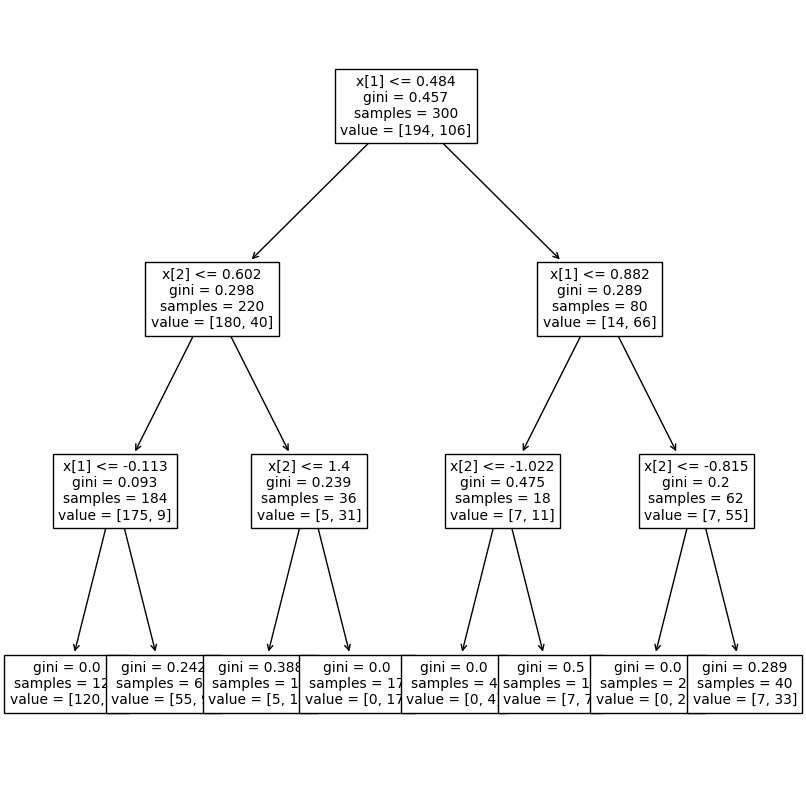

In [20]:
from sklearn import tree
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(clf_tree,fontsize=10)
plt.show

**Visualising the Test set results**

In [21]:
clf_tree=DecisionTreeClassifier(criterion='gini',max_depth=3)
clf_tree.fit(X_test,y_test)

DecisionTreeClassifier(max_depth=3)

[Text(0.5170454545454546, 0.96875, 'x[1] <= 0.484\ngini = 0.457\nsamples = 300\nvalue = [194, 106]'),
 Text(0.32386363636363635, 0.90625, 'x[2] <= 0.602\ngini = 0.298\nsamples = 220\nvalue = [180, 40]'),
 Text(0.17045454545454544, 0.84375, 'x[1] <= -0.113\ngini = 0.093\nsamples = 184\nvalue = [175, 9]'),
 Text(0.14772727272727273, 0.78125, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.19318181818181818, 0.78125, 'x[2] <= 0.395\ngini = 0.242\nsamples = 64\nvalue = [55, 9]'),
 Text(0.17045454545454544, 0.71875, 'x[2] <= -0.077\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.14772727272727273, 0.65625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.19318181818181818, 0.65625, 'x[2] <= 0.012\ngini = 0.327\nsamples = 34\nvalue = [27, 7]'),
 Text(0.13636363636363635, 0.59375, 'x[1] <= 0.186\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.11363636363636363, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1590909090909091, 0.53125, 'gini = 0.0\nsamples =

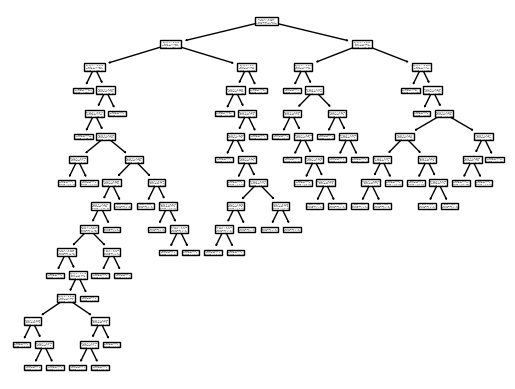

In [25]:

tree.plot_tree(dt)